In [3]:
import numpy as np


def Norm_vec(vec):
    # nornalize the length of this vector to 1
    norm = np.linalg.norm(vec)
    if norm == 0: 
        return vec
    return vec / norm
    
    
def HLI_train(bipolar_train, beta, gamma):
    gamma_fc = 0.898
    time, vec_size=np.shape(bipolar_train)
    Mtf = np.identity(vec_size)*0
    Mtf = np.repeat([Mtf],3,axis=0)
    Mft = np.identity(vec_size)*(1-gamma_fc)
    Mft = np.repeat([Mft],3,axis=0)
    t = np.zeros((3,1,vec_size))
    for i in range(time):
        for l in range(3):
#             print("layer:",l)
            if l==0:
                f = [bipolar_train[i]]
            else:
                f = t_below
            # each level depends on the level below
            t_in = np.dot(Mft[l],np.transpose(f))
            t_in = np.transpose(t_in)
            t_in = Norm_vec(t_in)
            t_tin=np.inner(t_in,t[l])
            ro = (1+beta[l]**2*(t_tin**2-1))**0.5 - beta[l]*(t_tin)
            f=np.array(f)
            # Chien (2020) Equatio 1
            t[l] = ro*t[l] + beta[l]*f
            t[l] = Norm_vec(t[l])
            Mtf[l] = Mtf[l] + np.dot(np.transpose(f),t[l])

            P = np.dot(np.transpose(f),f)/np.linalg.norm(f)**2
            B = 1/(gamma**2 + 2*gamma*np.inner(t_in, t[l]) + 1)
            A = gamma * B
            Mft[l] = Mft[l]*(1-P) + A*Mft[l]*P + B*np.dot(np.transpose(t[l]),f)
            t_below = t[l]

    return Mtf, Mft


def HLI_test(bipolar_test, Mtf, Mft,  beta, gamma):
    time, vec_size=np.shape(bipolar_test)
    t_in_arr = np.zeros((0,vec_size))
    t_arr = np.zeros((3,time,vec_size))
    t = np.zeros((3,1,vec_size))
    for i in range(time):
#         print("time",i)
        for l in range(3):
            if l==0:
                f = [bipolar_test[i]]
            else:
                f = t_below   
            t_in = np.dot(Mft[l],np.transpose(f)) #preexperimental
            t_in_arr = np.concatenate((t_in_arr,np.transpose(t_in)),0)
            t_in = np.transpose(t_in)
            t_in = Norm_vec(t_in)
            t_tin=np.inner(t_in,t[l])
            ro = (1+beta[l]**2*(t_tin**2-1))**0.5 - beta[l]*(t_tin)
            f=np.array(f)
            t[l] = ro*t[l] + beta[l]*f 
            t[l] = Norm_vec(t[l])
            t_arr[l][i] = t[l]
            t_below = t[l]

    return t_arr


In [210]:
bipolar_train=np.eye(30)
np.random.shuffle(bipolar_train)

Mtf, Mft=HLI_train(bipolar_train, [0.9,0.7,0.5],0.5)
t_arr=HLI_test(bipolar_train, Mtf, Mft,  beta, gamma)

In [217]:
t[]

(3, 30, 30)

/jukebox/pkgs/PYGER/neu350/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  # This is added back by InteractiveShellApp.init_path()
/usr/people/huichuan/.local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/people/huichuan/.local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/jukebox/pkgs/PYGER/neu350/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot command

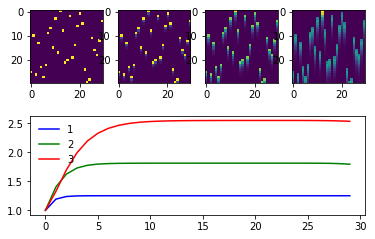

In [211]:
plt.subplot(2,4,1)
plt.imshow(bipolar_train)
for l in range(3):
    plt.subplot(2,4,l+2)
    plt.imshow(t_arr[l,:,:])

plt.subplot(2,1,2)
cols=['b','g','r']
for l in range(3):
    plt.plot(np.sum(t_arr[l,:,:],axis=1),cols[l])
    plt.hold(1)
plt.hold(0)
plt.legend([1,2,3],frameon=False)

In [272]:
a=np.array([1, 2, 3, 6, 5])
np.linalg.norm(a)
nm=Norm_vec(a)

np.linalg.norm(nm)

0.9999999999999999

In [212]:
beta=[0.9, 0.7, 0.5]
gamma=0.5
Mtf, Mft = HLI_train(bipolar_train, beta, gamma)
    

In [274]:
gamma_fc = 0.898
time, vec_size=np.shape(bipolar_train)
Mtf = np.identity(vec_size)*0
Mtf = np.repeat([Mtf],3,axis=0)
Mft = np.identity(vec_size)*(1-gamma_fc)
Mft = np.repeat([Mft],3,axis=0)
t = np.zeros((3,1,vec_size))

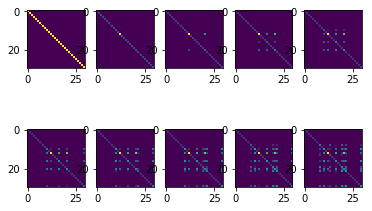

In [275]:
for i in range(10):
    for l in range(3):
#             print("layer:",l)
        if l==0:
            f = [bipolar_train[i]]
        else:
            f = t_below
        t_in = np.dot(Mft[l],np.transpose(f))
        t_in = np.transpose(t_in)
        t_in = Norm_vec(t_in)
        t_tin=np.inner(t_in,t[l])
        ro = (1+beta[l]**2*(t_tin**2-1))**0.5 - beta[l]*(t_tin)
       
        f=np.array(f)
        t[l] = ro*t[l] + beta[l]*f
        t[l] = Norm_vec(t[l])
        plt.subplot(2,5,i+1);
        plt.imshow(Mft[l])
        Mtf[l] = Mtf[l] + np.dot(np.transpose(f),t[l])

        P = np.dot(np.transpose(f),f)/np.linalg.norm(f)**2
        B = 1/(gamma**2 + 2*gamma*np.inner(t_in, t[l]) + 1)
        A = gamma * B
        Mft[l] = Mft[l]*(1-P) + A*Mft[l]*P + B*np.dot(np.transpose(t[l]),f)
        t_below = t[l]

In [276]:
# Mft is updateed with each time step during traing. During the test period, the trained Mft is used without update.
# Mtf is never used anywhere...

In [298]:
f[0,8]



0.34252414042198814

In [299]:
P[8,8]

0.11732278677182185

In [300]:
np.linalg.norm(f[0,8])**2

0.11732278677182185

In [303]:
np.dot(np.transpose(f[0,8]),f[0,8])/np.linalg.norm(f[0,8])**2

1.0

In [305]:
P[8,8]

0.11732278677182185